In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df  = pd.read_csv('/content/drive/MyDrive/secondary_data.csv', sep=';')

In [ ]:
df_1 = df.loc[df["class"] == "e"]
df_2 = df.loc[df["class"] == "p"]

In [ ]:
X_1 = df_1.drop("class", axis=1)
X_2 = df_2.drop("class", axis=1)
y_1 = df_1["class"]
y_2 = df_2["class"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.15, random_state=87)
X_train_1, X_validation_1, y_train_1, y_validation_1 = train_test_split(X_train_1, y_train_1, test_size=0.18, random_state=87)

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.15, random_state=87)
X_train_2, X_validation_2, y_train_2, y_validation_2 = train_test_split(X_train_2, y_train_2, test_size=0.18, random_state=87)

In [ ]:
X_train_inicial = pd.concat([X_train_1, X_train_2], ignore_index=True)
X_validation_inicial = pd.concat([X_validation_1, X_validation_2], ignore_index=True)
X_test_inicial = pd.concat([X_test_1, X_test_2], ignore_index=True)

y_train = pd.concat([y_train_1, y_train_2], ignore_index=True)
y_validation= pd.concat([y_validation_1, y_validation_2], ignore_index=True)
y_test = pd.concat([y_test_1, y_test_2], ignore_index=True)

#Analisis para la imputacion de nulos:

In [ ]:
nan_columns = X_train_inicial.columns[X_train_inicial.isna().any()]
X_train_inicial[nan_columns].isna().mean()

cap-surface          0.230999
gill-attachment      0.161032
gill-spacing         0.411837
stem-root            0.845617
stem-surface         0.624134
veil-type            0.948429
veil-color           0.878909
ring-type            0.040693
spore-print-color    0.896929
dtype: float64

In [ ]:
import random
random.seed(10)

In [ ]:
def rellenar_nulos_segun_prob(dataset, columna):
  valores_probas = dataset[columna].value_counts(normalize = True)
  valores = valores_probas.index.tolist()
  probas = valores_probas.tolist()
  dataset[columna] = dataset[columna].fillna(random.choices(valores, weights=probas)[0])

##Analisis *'cap-surface'*

In [ ]:
X_train_inicial['cap-surface'].unique() #Voy a rellenar los Nan segun la proba ya que no son muchos y no tengo otra info

array(['d', 's', nan, 't', 'g', 'e', 'w', 'y', 'l', 'h', 'i', 'k'],
      dtype=object)

In [ ]:
rellenar_nulos_segun_prob(X_train_inicial, 'cap-surface')
rellenar_nulos_segun_prob(X_validation_inicial, 'cap-surface')
rellenar_nulos_segun_prob(X_test_inicial, 'cap-surface')

##Analisis *'gill-attachment'* y *'gill-spacing'*

In [ ]:
X_train_inicial['gill-attachment'].unique()

array(['p', 's', 'x', 'a', nan, 'e', 'f', 'd'], dtype=object)

In [ ]:
X_train_inicial['gill-spacing'].unique()

array([nan, 'c', 'f', 'd'], dtype=object)

In [ ]:
X_train_inicial.loc[X_train_inicial['gill-attachment'].isna(), ['gill-spacing', 'gill-attachment']]

,gill-spacing,gill-attachment
11,c,NaN
22,NaN,NaN
26,NaN,NaN
39,NaN,NaN
40,c,NaN
...,...,...
42529,NaN,NaN
42537,c,NaN
42539,NaN,NaN
42551,NaN,NaN


In [ ]:
X_train_inicial.loc[X_train_inicial['gill-spacing'].isna(), ['gill-spacing', 'gill-attachment']]

,gill-spacing,gill-attachment
0,NaN,p
3,NaN,p
5,NaN,p
6,NaN,p
7,NaN,p
...,...,...
42557,NaN,a
42559,NaN,a
42560,NaN,p
42561,NaN,a


In [ ]:
X_train_inicial.loc[(X_train_inicial['gill-attachment'].isna()) & (X_train_inicial['gill-spacing'].isna()), ['gill-spacing', 'gill-attachment']]

,gill-spacing,gill-attachment
22,NaN,NaN
26,NaN,NaN
39,NaN,NaN
51,NaN,NaN
108,NaN,NaN
...,...,...
42528,NaN,NaN
42529,NaN,NaN
42539,NaN,NaN
42551,NaN,NaN


In [ ]:
X_train_inicial.loc[(X_train_inicial['gill-attachment'].isna()) & (X_train_inicial['gill-spacing'] == 'f'), ['gill-spacing', 'gill-attachment']] #Si tuviese una f(None) en una columna relleno con None en la otra, no es el caso

,gill-spacing,gill-attachment


In [ ]:
X_train_inicial.loc[(X_train_inicial['gill-attachment'] == 'f') & (X_train_inicial['gill-spacing'].isna()), ['gill-spacing', 'gill-attachment']] #Si tuviese una f(None) en una columna relleno con None en la otra, no es el caso

,gill-spacing,gill-attachment


In [ ]:
#Para los que tienen Nan en ambas columnas los relleno con "Unknown value" ya que considero que no se pudo conseguir esa informacion
X_train_inicial.loc[(X_train_inicial['gill-attachment'].isna()) & (X_train_inicial['gill-spacing'].isna()), ['gill-spacing', 'gill-attachment']] = 'Unknown value'
X_validation_inicial.loc[(X_validation_inicial['gill-attachment'].isna()) & (X_validation_inicial['gill-spacing'].isna()), ['gill-spacing', 'gill-attachment']] = 'Unknown value'
X_test_inicial.loc[(X_test_inicial['gill-attachment'].isna()) & (X_test_inicial['gill-spacing'].isna()), ['gill-spacing', 'gill-attachment']] = 'Unknown value'

In [ ]:
#En cambio para los que tienen una sola columna como Nan los relleno segun la probabilidad, ya que considero que se podia conseguir esa informacion

rellenar_nulos_segun_prob(X_train_inicial, 'gill-attachment')
rellenar_nulos_segun_prob(X_validation_inicial, 'gill-attachment')
rellenar_nulos_segun_prob(X_test_inicial, 'gill-attachment')

rellenar_nulos_segun_prob(X_train_inicial, 'gill-spacing')
rellenar_nulos_segun_prob(X_validation_inicial, 'gill-spacing')
rellenar_nulos_segun_prob(X_test_inicial, 'gill-spacing')

##Analisis *'stem-root'* y *'stem-surface'*

In [ ]:
X_train_inicial['stem-root'].unique()

array([nan, 'b', 's', 'f', 'c', 'r'], dtype=object)

In [ ]:
X_train_inicial['stem-surface'].unique()

array([nan, 'i', 'y', 't', 's', 'k', 'f', 'g', 'h'], dtype=object)

In [ ]:
X_train_inicial.loc[X_train_inicial['stem-surface'].isna(), ['stem-height', 'stem-width', 'stem-root',	'stem-surface']]

,stem-height,stem-width,stem-root,stem-surface
0,7.01,13.60,NaN,NaN
2,5.82,3.49,NaN,NaN
3,6.44,12.96,NaN,NaN
4,5.23,10.72,NaN,NaN
6,5.86,11.98,NaN,NaN
...,...,...,...,...
42554,5.95,2.64,NaN,NaN
42556,2.89,1.36,NaN,NaN
42557,9.32,12.24,NaN,NaN
42560,8.21,20.56,NaN,NaN


In [ ]:
X_train_inicial.loc[X_train_inicial['stem-root'].isna(), ['stem-height', 'stem-width', 'stem-root',	'stem-surface']]

,stem-height,stem-width,stem-root,stem-surface
0,7.01,13.60,NaN,NaN
2,5.82,3.49,NaN,NaN
3,6.44,12.96,NaN,NaN
4,5.23,10.72,NaN,NaN
5,9.94,22.11,NaN,y
...,...,...,...,...
42558,8.96,8.67,NaN,i
42559,5.15,7.13,NaN,t
42560,8.21,20.56,NaN,NaN
42561,3.75,6.10,NaN,NaN


In [ ]:
X_train_inicial.loc[(X_train_inicial['stem-root'].isna()) & (X_train_inicial['stem-surface'].isna()), ['stem-root', 'stem-surface']]

,stem-root,stem-surface
0,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
6,NaN,NaN
...,...,...
42554,NaN,NaN
42556,NaN,NaN
42557,NaN,NaN
42560,NaN,NaN


In [ ]:
X_train_inicial.loc[(X_train_inicial['stem-root'] == 'f') & (X_train_inicial['stem-surface'].isna()), ['stem-root', 'stem-surface']]  #Si tuviese una f(None) en una columna relleno con None en la otra, no es el caso

,stem-root,stem-surface


In [ ]:
X_train_inicial.loc[(X_train_inicial['stem-root'].isna()) & (X_train_inicial['stem-surface']  == 'f'), ['stem-root', 'stem-surface']]  #Si tuviese una f(None) en una columna relleno con None en la otra, no es el caso

,stem-root,stem-surface


In [ ]:
#Para los que tienen Nan en ambas columnas los relleno con "Unknown value" ya que considero que no se pudo conseguir esa informacion
X_train_inicial.loc[(X_train_inicial['stem-root'].isna()) & (X_train_inicial['stem-surface'].isna()), ['stem-root', 'stem-surface']] = 'Unknown value'
X_validation_inicial.loc[(X_validation_inicial['stem-root'].isna()) & (X_validation_inicial['stem-surface'].isna()), ['stem-root', 'stem-surface']] = 'Unknown value'
X_test_inicial.loc[(X_test_inicial['stem-root'].isna()) & (X_test_inicial['stem-surface'].isna()), ['stem-root', 'stem-surface']] = 'Unknown value'

In [ ]:
#En cambio para los que tienen una sola columna como Nan los relleno segun la probabilidad, ya que considero que se podia conseguir esa informacion

rellenar_nulos_segun_prob(X_train_inicial, 'stem-root')
rellenar_nulos_segun_prob(X_validation_inicial, 'stem-root')
rellenar_nulos_segun_prob(X_test_inicial, 'stem-root')

rellenar_nulos_segun_prob(X_train_inicial, 'stem-surface')
rellenar_nulos_segun_prob(X_validation_inicial, 'stem-surface')
rellenar_nulos_segun_prob(X_test_inicial, 'stem-surface')

##Analisis *'veil-type'*

In [ ]:
X_train_inicial['veil-type'].unique() #Como la documentacion dice que el veil-type puede ser u (universal) o p (partial) asumo que los Nan son p

array([nan, 'u'], dtype=object)

In [ ]:
X_train_inicial['veil-type'] = X_train_inicial['veil-type'].fillna('p')
X_validation_inicial['veil-type'] = X_validation_inicial['veil-type'].fillna('p')
X_test_inicial['veil-type'] = X_test_inicial['veil-type'].fillna('p')

##Analisis *'veil-color'*

In [ ]:
X_train_inicial['veil-color'].unique() #La mayoria de valores son Nan, los llenare entonces con Unknown value

array([nan, 'w', 'y', 'k', 'n', 'u', 'e'], dtype=object)

In [ ]:
X_train_inicial['veil-color'] = X_train_inicial['veil-color'].fillna('Unknown value')
X_validation_inicial['veil-color'] = X_validation_inicial['veil-color'].fillna('Unknown value')
X_test_inicial['veil-color'] = X_test_inicial['veil-color'].fillna('Unknown value')

##Analisis *'ring-type'*

In [ ]:
X_train_inicial['ring-type'].unique() #Son muy pocos los valores Nan, rellenare segun la probabilidad

array(['f', 'e', 'g', 'r', 'p', 'l', nan, 'm', 'z'], dtype=object)

In [ ]:
X_train_inicial.loc[(X_train_inicial['ring-type'].isna()) & (X_train_inicial['has-ring'] == 'f')] #Veo que efectivamente los que tienen Nan en ring-type es porque es desconocido ya que todos tienen ring segun has-ring, no puedo ponerle f(None) a niguno

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season


In [ ]:
rellenar_nulos_segun_prob(X_train_inicial, 'ring-type')
rellenar_nulos_segun_prob(X_validation_inicial, 'ring-type')
rellenar_nulos_segun_prob(X_test_inicial,  'ring-type')

##Analisis *'spore-print-color'*

In [ ]:
X_train_inicial['spore-print-color'].unique() #La mayoria de valores son Nan, los llenare entonces con Unknown value

array([nan, 'p', 'k', 'g', 'w', 'n', 'u', 'r'], dtype=object)

In [ ]:
X_train_inicial['spore-print-color'] = X_train_inicial['spore-print-color'].fillna('Unknown value')
X_validation_inicial['spore-print-color'] = X_validation_inicial['spore-print-color'].fillna('Unknown value')
X_test_inicial['spore-print-color'] = X_test_inicial['spore-print-color'].fillna('Unknown value')

#Encodings:

In [ ]:
#Para el target 1 si es e, 0 si es p

In [ ]:
y_train = y_train.map(lambda x: 1 if x == 'e' else 0)
y_validation = y_validation.map(lambda x: 1 if x == 'e' else 0)
y_test = y_test.map(lambda x: 1 if x == 'e' else 0)

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import category_encoders as ce

In [ ]:
ohe_features = ce.OneHotEncoder(cols = ["does-bruise-or-bleed", "has-ring", "veil-type"], return_df=True)
X_train = ohe_features.fit_transform(X_train_inicial)
X_test = ohe_features.transform(X_test_inicial)
X_validation = ohe_features.transform(X_validation_inicial)

In [ ]:
te_features =  ce.TargetEncoder(cols = ["habitat", "season"], smoothing=2, return_df=True)
X_train = te_features.fit_transform(X_train, y_train)
X_test = te_features.transform(X_test, y_test)
X_validation = te_features.transform(X_validation, y_validation)

In [ ]:
be_features = ce.BinaryEncoder(cols = ["cap-shape", "cap-surface", "cap-color", "gill-attachment", "gill-spacing", "gill-color",
              "stem-color", "ring-type", "stem-root", "stem-surface", "veil-color", "spore-print-color"], return_df=True)
X_train = be_features.fit_transform(X_train)
X_test = be_features.transform(X_test)
X_validation = be_features.transform(X_validation)

In [ ]:
len(X_train.columns)

55

#XGBoost

In [ ]:
import xgboost as xgb

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
xgb_clf = xgb.XGBClassifier(random_state=10)

In [ ]:
params = [
    {'objective': ["binary:logistic"]},
    {'max_depth': [5, 10, 15, 20]},
    {"learning_rate": [0.1, 0.2, 0.3, 0.5]},
    {"colcample_bytree": [0.3, 0.4, 0.5]},
    {"subsample": [0.3, 0.5, 0.7]},
    {"alpha" : [5, 7, 10]},
    {"n_estimators" : [60, 100, 150, 200, 400]},
]

In [ ]:
gs = GridSearchCV(xgb_clf, param_grid = params, cv=5, scoring='roc_auc')

In [ ]:
gs.fit(X_train, y_train)

[16:57:53] WARNING: ../src/learner.cc:767: 
Parameters: { "colcample_bytree" } are not used.

[16:58:03] WARNING: ../src/learner.cc:767: 
Parameters: { "colcample_bytree" } are not used.

[16:58:12] WARNING: ../src/learner.cc:767: 
Parameters: { "colcample_bytree" } are not used.

[16:58:23] WARNING: ../src/learner.cc:767: 
Parameters: { "colcample_bytree" } are not used.

[16:58:34] WARNING: ../src/learner.cc:767: 
Parameters: { "colcample_bytree" } are not used.

[16:58:45] WARNING: ../src/learner.cc:767: 
Parameters: { "colcample_bytree" } are not used.

[16:58:53] WARNING: ../src/learner.cc:767: 
Parameters: { "colcample_bytree" } are not used.

[16:59:04] WARNING: ../src/learner.cc:767: 
Parameters: { "colcample_bytree" } are not used.

[16:59:15] WARNING: ../src/learner.cc:767: 
Parameters: { "colcample_bytree" } are not used.

[16:59:26] WARNING: ../src/learner.cc:767: 
Parameters: { "colcample_bytree" } are not used.

[16:59:34] WARNING: ../src/learner.cc:767: 
Parameters: { "c

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=10, ...),
             param_grid=[{'objective': ['binary:logistic']},
                         {'max_depth': [5, 10, 15, 20]},
                         {'learning_rate': [0.1, 0.2, 0.3, 0.5]},
                         {'colcample_bytree': [0.3, 0.4, 0.5]},
                         {'subsample': [0.3, 0.5, 0.7]}, {'alpha': [5, 7, 10]},
                         {'n_estimators': [60, 100, 150, 200, 400]}],
             scoring='roc_auc')

In [ ]:
gs.best_params_

{'n_estimators': 200}

In [ ]:
xgb_clf = gs.best_estimator_

In [ ]:
xgb_clf

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=10, ...)

In [ ]:
roc_auc_score(y_validation, xgb_clf.predict_proba(X_validation)[:, 1])

0.9930291640185925

In [ ]:
roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1]) #El score para test es 0.9866276471897912

0.9866276471897912

In [ ]:
y_pred_test = xgb_clf.predict(X_test)

In [ ]:
y_pred_test

array([1, 1, 0, ..., 0, 0, 0])

In [ ]:
df_test_con_predicciones = X_test_inicial.copy()

In [ ]:
df_test_con_predicciones['clase_real'] = y_test
df_test_con_predicciones['clase_predicha'] = y_pred_test

In [ ]:
df_test_con_predicciones.to_csv('/content/drive/MyDrive/modelo_xgb_clf_con_predicc.csv')

Predicciones: https://drive.google.com/file/d/1DJntXhkW77KYj9Cuj3sq0cpl0ChEGTDn/view?usp=drive_link

In [ ]:
xgb_clf.save_model('/content/drive/MyDrive/xgb_clf_mushroom.json')

In [ ]:
xgb_clf.feature_importances_

array([0.00723716, 0.00532543, 0.00905138, 0.0088079 , 0.01186803,
       0.02509011, 0.00809052, 0.00695985, 0.01688111, 0.00888828,
       0.01751531, 0.00837924, 0.01689826, 0.        , 0.02419577,
       0.01090011, 0.0115074 , 0.01574323, 0.        , 0.00950301,
       0.01646178, 0.01211997, 0.01071907, 0.0124858 , 0.00552678,
       0.01179096, 0.01509257, 0.06990296, 0.0175989 , 0.02361885,
       0.05300372, 0.0162868 , 0.01815627, 0.00473616, 0.01828799,
       0.0120525 , 0.00828924, 0.01082319, 0.02541511, 0.        ,
       0.05500497, 0.03629289, 0.08795229, 0.00916465, 0.        ,
       0.08668599, 0.03184371, 0.0017602 , 0.00966708, 0.        ,
       0.02644038, 0.01553713, 0.0026336 , 0.03250233, 0.01930403],
      dtype=float32)

In [ ]:
feature_importance = pd.DataFrame(data={
    'Feature': X_train.columns,
    'Importance': xgb_clf.feature_importances_
})

In [ ]:
cols_iniciales = X_train_inicial.columns

In [ ]:
suma_features = {}
for nombre_col in cols_iniciales:
  suma_features[nombre_col] = 0

In [ ]:
for nombre_col in cols_iniciales:
  suma_features[nombre_col] = feature_importance[feature_importance['Feature'].str.contains(nombre_col)]['Importance'].sum()

In [ ]:
feature_importance = pd.DataFrame(data={"Feature" : suma_features.keys(), "Importance" : suma_features.values()})

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'cap-diameter'),
  Text(1, 0, 'cap-shape'),
  Text(2, 0, 'cap-surface'),
  Text(3, 0, 'cap-color'),
  Text(4, 0, 'does-bruise-or-bleed'),
  Text(5, 0, 'gill-attachment'),
  Text(6, 0, 'gill-spacing'),
  Text(7, 0, 'gill-color'),
  Text(8, 0, 'stem-height'),
  Text(9, 0, 'stem-width'),
  Text(10, 0, 'stem-root'),
  Text(11, 0, 'stem-surface'),
  Text(12, 0, 'stem-color'),
  Text(13, 0, 'veil-type'),
  Text(14, 0, 'veil-color'),
  Text(15, 0, 'has-ring'),
  Text(16, 0, 'ring-type'),
  Text(17, 0, 'spore-print-color'),
  Text(18, 0, 'habitat'),
  Text(19, 0, 'season')])

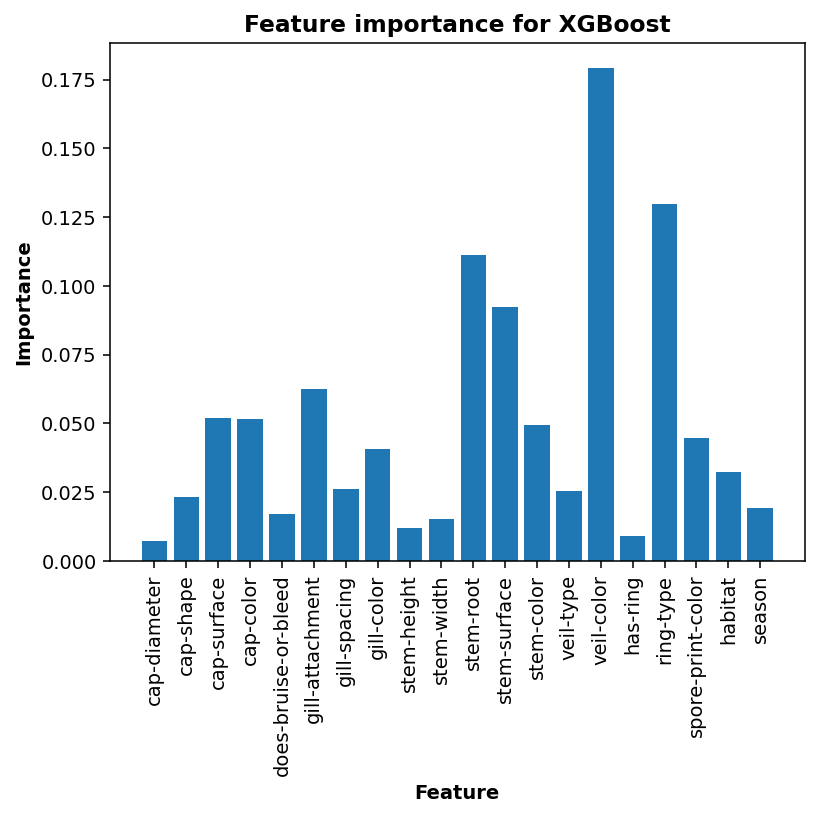

In [ ]:
import matplotlib.pyplot as plt
plt.figure(dpi=140)
plt.bar(x=feature_importance['Feature'], height=feature_importance['Importance'])
plt.title("Feature importance for XGBoost", fontweight= "bold")
plt.xlabel(xlabel="Feature", fontweight= "bold")
plt.ylabel(ylabel="Importance", fontweight= "bold")
plt.xticks(rotation=90)

¿Por qué cree que logro/no logro el mismo valor de AUC que con Random Forest?

Considero que se logro el mismo valor (0.993 y 1) ya que ambos modelos se basan en tecnicas de ensamle (Bagging para RF y Boosting para XGB) con lo cual podemos conseguir una complejidad que puede entender los patrones de los datos y ambos son modelos de arboles que comparten muchas similitudes, incluidos muchos hiperparametros.
Ademas, se ve que tenemos un set de datos simple ya que ambos modelos pueden captar las relaciones entre features para predecir de gran forma y el paper nos dice que los datos estan balanceados, lo que es de ayuda.
Pese a esto, grafique la feature importance para el Random Forest y para el XGBoost y se puede ver que no son tan similares. Estimo que ambos modelos encontraron patrones distintos, o al menos se basan en distintas features, pero pese a eso ambos pueden llegar a un gran score para Auc-Roc.